In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use("seaborn-whitegrid")

df = pd.read_csv("../../../data/autos.csv")
df.head()

C:\Users\Master\AppData\Local\Temp\ipykernel_13496\3837018582.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,16500
2,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9,154,5000,19,26,16500
3,2,audi,gas,std,4,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10,102,5500,24,30,13950
4,2,audi,gas,std,4,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8,115,5500,18,22,17450


In [6]:
x = df.copy()
y = x.pop("price") # 종속변수 

#범주형 데이터 >> 라벨인코딩
#pd.factorize() >> 첫번째 값은 정수로 인코딩된 값, 두번째 값은 인코딩된 범주

for colname in x.select_dtypes("object"):
    x[colname], _ = x[colname].factorize()
    
#x의 데이터타입을 모두 int로 변경 
#범주형 변수 목록 
discrete_features = x.dtypes == int


symboling            False
make                 False
fuel_type            False
aspiration           False
num_of_doors         False
body_style           False
drive_wheels         False
engine_location      False
wheel_base           False
length               False
width                False
height               False
curb_weight          False
engine_type          False
num_of_cylinders     False
engine_size          False
fuel_system          False
bore                 False
stroke               False
compression_ratio    False
horsepower           False
peak_rpm             False
city_mpg             False
highway_mpg          False
dtype: bool

In [5]:
#mutual_info_regression >>> 회귀 문제에서 특징(피처)과 타겟 변수 간의 상호 정보를 계산하는 데 사용
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(x, y, discrete_features):
    #x 와 y 의 상호 정보 점수 계산 
    mi_scores = mutual_info_regression(x, y, discrete_features=discrete_features)
    #mi_scores를 시리즈로 변환 
    mi_scores = pd.Series(mi_scores, name="MI Scores", index = x.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    
    return mi_scores

mi_scores = make_mi_scores(x, y, discrete_features)
mi_scores[::3]

#price와 상호정보가 높은 것은 curb_weight다  >> 상관관계가 높다

curb_weight          0.914953
horsepower           0.881871
length               0.597431
fuel_system          0.470839
drive_wheels         0.332490
symboling            0.233888
compression_ratio    0.107306
fuel_type            0.048139
Name: MI Scores, dtype: float64

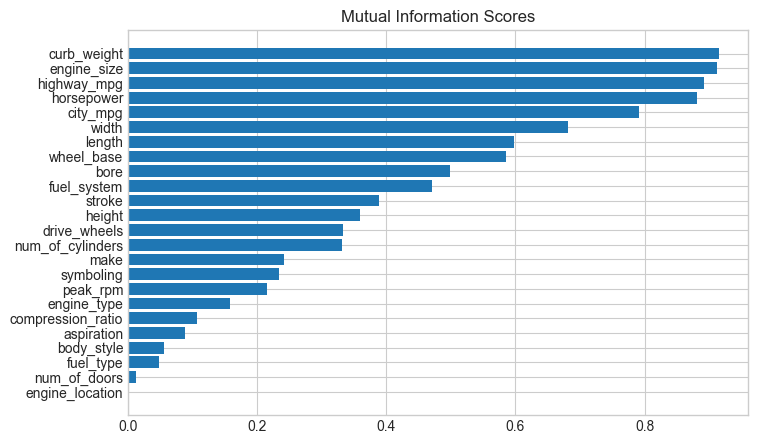

In [7]:
def plot_mi_scores(scores):
    scores =scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")
    
plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

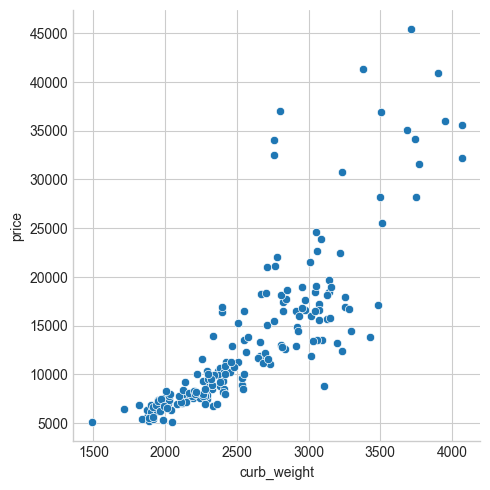

In [9]:
sns.relplot(x="curb_weight", y="price", data=df)

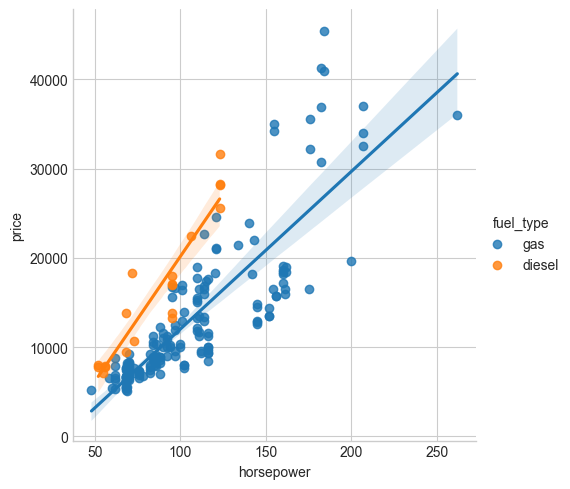

In [11]:
sns.lmplot(x="horsepower", y = 'price', hue = 'fuel_type', data=df)